# Exploratory Data Analysis on 'emotion' Dataset


### Dataset Summary
Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.

The entire analyis is divided into two Steps. 
1) Text Preprocessing -In this step, I will be analyse the text data and work on removing punctuations, stopwords, working on contractions and lemmantization. 

2) Analysis and Visualization- In this step I will analyse four different aspects

    1) Distribution of data amongst labels

    2) Sentiment Analysis

    3) Text length Analysis

    4) Word Level Analysis 

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import nltk
import contractions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Importing the Dataset

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("emotion")
dataset

Using custom data configuration default
Found cached dataset emotion (C:/Users/risha/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 333.32it/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
df=pd.DataFrame(dataset['train'])
df

text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

In [6]:
print('Column_Names: ', df.columns)

Column_Names:  Index(['text', 'label'], dtype='object')


#### Label Description

In [7]:
dataset['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

### Check for null values

In [8]:
for col in df.columns:
    print(col, df[col].isnull().sum())

text 0
label 0


### Adding label_name Column

In [9]:
display(df.head())

def label_int2str(row):
    return dataset['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)

display(df.head())

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

# 1) Text Pre-Processing


In [10]:
df_pre=df.loc[:]
df_pre

text  label label_name
0                                i didnt feel humiliated      0    sadness
1      i can go from feeling so hopeless to so damned...      0    sadness
2       im grabbing a minute to post i feel greedy wrong      3      anger
3      i am ever feeling nostalgic about the fireplac...      2       love
4                                   i am feeling grouchy      3      anger
...                                                  ...    ...        ...
15995  i just had a very brief time in the beanbag an...      0    sadness
15996  i am now turning and i feel pathetic that i am...      0    sadness
15997                     i feel strong and good overall      1        joy
15998  i feel like this was such a rude comment and i...      3      anger
15999  i know a lot but i feel so stupid because i ca...      0    sadness

[16000 rows x 3 columns]

## 1) Checking for Contractions in the text

Contractions are the shorthands that we use in english language like 'didnt' for 'did not', 'i've' for 'i have' etc. We need to expand these contractions into correct separate words words. I am using fix() from 'contractions' package for this purpose.

In [11]:
df[df['text'].str.contains('didnt| ive | im ')]

text  label label_name
0                                i didnt feel humiliated      0    sadness
6      ive been taking or milligrams or times recomme...      5   surprise
16                  i didnt really feel that embarrassed      0    sadness
26     i feel so inhibited in someone elses kitchen l...      0    sadness
42     ive worn it once on its own with a little conc...      1        joy
...                                                  ...    ...        ...
15970      i have to admit im feeling pretty overwhelmed      5   surprise
15976                             i didnt feel exhausted      0    sadness
15988            i feel pathetic because im still single      0    sadness
15989  i need to do this that and the other for colle...      5   surprise
15998  i feel like this was such a rude comment and i...      3      anger

[1542 rows x 3 columns]

In [12]:
df_pre['no_contract'] = df_pre['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df_pre

text  label label_name  \
0                                i didnt feel humiliated      0    sadness   
1      i can go from feeling so hopeless to so damned...      0    sadness   
2       im grabbing a minute to post i feel greedy wrong      3      anger   
3      i am ever feeling nostalgic about the fireplac...      2       love   
4                                   i am feeling grouchy      3      anger   
...                                                  ...    ...        ...   
15995  i just had a very brief time in the beanbag an...      0    sadness   
15996  i am now turning and i feel pathetic that i am...      0    sadness   
15997                     i feel strong and good overall      1        joy   
15998  i feel like this was such a rude comment and i...      3      anger   
15999  i know a lot but i feel so stupid because i ca...      0    sadness   

                                             no_contract  
0                         [i, did not, feel, humiliated]  
1      [i, can, go, from, feeling, so, hopeless, to, ...  
2      [i am, grabbing, a, minute, to, post, i, feel,...  
3      [i, am, ever, feeling, nostalgic, about, the, ...  
4                              [i, am, feeling, grouchy]  
...                                                  ...  
15995  [i, just, had, a, very, brief, time, in, the, ...  
15996  [i, am, now, turning, and, i, feel, pathetic, ...  
15997              [i, feel, strong, and, good, overall]  
15998  [i, feel, like, this, was, such, a, rude, comm...  
15999  [i, know, a, lot, but, i, feel, so, stupid, be...  

[16000 rows x 4 columns]

In [13]:
df_pre['text_str'] = df_pre['no_contract'].str.join(' ')
df_pre

text  label label_name  \
0                                i didnt feel humiliated      0    sadness   
1      i can go from feeling so hopeless to so damned...      0    sadness   
2       im grabbing a minute to post i feel greedy wrong      3      anger   
3      i am ever feeling nostalgic about the fireplac...      2       love   
4                                   i am feeling grouchy      3      anger   
...                                                  ...    ...        ...   
15995  i just had a very brief time in the beanbag an...      0    sadness   
15996  i am now turning and i feel pathetic that i am...      0    sadness   
15997                     i feel strong and good overall      1        joy   
15998  i feel like this was such a rude comment and i...      3      anger   
15999  i know a lot but i feel so stupid because i ca...      0    sadness   

                                             no_contract  \
0                         [i, did not, feel, humiliated]   
1      [i, can, go, from, feeling, so, hopeless, to, ...   
2      [i am, grabbing, a, minute, to, post, i, feel,...   
3      [i, am, ever, feeling, nostalgic, about, the, ...   
4                              [i, am, feeling, grouchy]   
...                                                  ...   
15995  [i, just, had, a, very, brief, time, in, the, ...   
15996  [i, am, now, turning, and, i, feel, pathetic, ...   
15997              [i, feel, strong, and, good, overall]   
15998  [i, feel, like, this, was, such, a, rude, comm...   
15999  [i, know, a, lot, but, i, feel, so, stupid, be...   

                                                text_str  
0                              i did not feel humiliated  
1      i can go from feeling so hopeless to so damned...  
2      i am grabbing a minute to post i feel greedy w...  
3      i am ever feeling nostalgic about the fireplac...  
4                                   i am feeling grouchy  
...                                                  ...  
15995  i just had a very brief time in the beanbag an...  
15996  i am now turning and i feel pathetic that i am...  
15997                     i feel strong and good overall  
15998  i feel like this was such a rude comment and i...  
15999  i know a lot but i feel so stupid because i ca...  

[16000 rows x 5 columns]

## 2) Checking for upper case letters in the text

In [14]:
df_pre[df_pre['text_str'].apply(lambda x:any(ele.isupper() for ele in x))]

Empty DataFrame
Columns: [text, label, label_name, no_contract, text_str]
Index: []

## 3) Checking for punctuations in the text

In [15]:
punc=string.punctuation
df_pre[df_pre['text_str'].apply(lambda x:any(ele in punc for ele in x))]

Empty DataFrame
Columns: [text, label, label_name, no_contract, text_str]
Index: []

## 4) Tokenize


In [16]:
def tokenization(inputs):
    return word_tokenize(inputs)

df_pre['text_tokenized'] = df_pre['text_str'].apply(tokenization)

df_pre.head()

text  label label_name  \
0                            i didnt feel humiliated      0    sadness   
1  i can go from feeling so hopeless to so damned...      0    sadness   
2   im grabbing a minute to post i feel greedy wrong      3      anger   
3  i am ever feeling nostalgic about the fireplac...      2       love   
4                               i am feeling grouchy      3      anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                            text_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                      text_tokenized  
0                    [i, did, not, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i, am, grabbing, a, minute, to, post, i, feel...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

## 5) Stopword Removal
There are a lot stopwords in the english language like i,and,to,their,the,of etc. These words do not add any value for sentiment analysis and hence we need to remove them in order to create clean data. 
I will be using NLTK stopwords library to remove these words.


In [17]:
allwords=[]
words=df_pre['text_tokenized']
for wordlist in words:
    allwords += wordlist

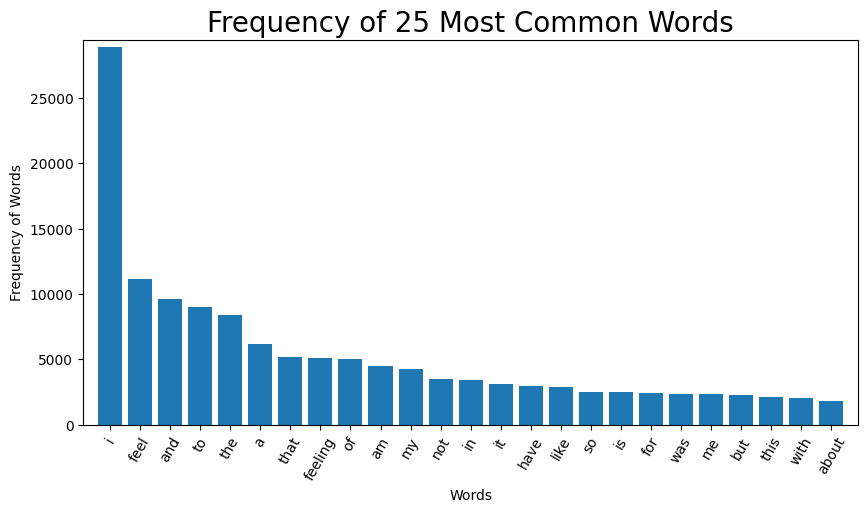

In [18]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

In [19]:
stop_words = set(stopwords.words('english'))
df_pre['stopwords_removed'] = df_pre['text_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df_pre.head()

text  label label_name  \
0                            i didnt feel humiliated      0    sadness   
1  i can go from feeling so hopeless to so damned...      0    sadness   
2   im grabbing a minute to post i feel greedy wrong      3      anger   
3  i am ever feeling nostalgic about the fireplac...      2       love   
4                               i am feeling grouchy      3      anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                            text_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                      text_tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  
0                                 [feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2      [grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]

# 6) Lemmatization

Lemmatization is a text normalization technique that switches any kind of a word to its base root mode. That is, 'felt','feeling','feels' all are converted to the root word feel. I am using WordNetLemmatizer() from nltk.stem module for this purpose

In [20]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

df_pre['text_lemmatized'] = df_pre['stopwords_removed'].apply(lemmatization)

df_pre

text  label label_name  \
0                                i didnt feel humiliated      0    sadness   
1      i can go from feeling so hopeless to so damned...      0    sadness   
2       im grabbing a minute to post i feel greedy wrong      3      anger   
3      i am ever feeling nostalgic about the fireplac...      2       love   
4                                   i am feeling grouchy      3      anger   
...                                                  ...    ...        ...   
15995  i just had a very brief time in the beanbag an...      0    sadness   
15996  i am now turning and i feel pathetic that i am...      0    sadness   
15997                     i feel strong and good overall      1        joy   
15998  i feel like this was such a rude comment and i...      3      anger   
15999  i know a lot but i feel so stupid because i ca...      0    sadness   

                                             no_contract  \
0                         [i, did not, feel, humiliated]   
1      [i, can, go, from, feeling, so, hopeless, to, ...   
2      [i am, grabbing, a, minute, to, post, i, feel,...   
3      [i, am, ever, feeling, nostalgic, about, the, ...   
4                              [i, am, feeling, grouchy]   
...                                                  ...   
15995  [i, just, had, a, very, brief, time, in, the, ...   
15996  [i, am, now, turning, and, i, feel, pathetic, ...   
15997              [i, feel, strong, and, good, overall]   
15998  [i, feel, like, this, was, such, a, rude, comm...   
15999  [i, know, a, lot, but, i, feel, so, stupid, be...   

                                                text_str  \
0                              i did not feel humiliated   
1      i can go from feeling so hopeless to so damned...   
2      i am grabbing a minute to post i feel greedy w...   
3      i am ever feeling nostalgic about the fireplac...   
4                                   i am feeling grouchy   
...                                                  ...   
15995  i just had a very brief time in the beanbag an...   
15996  i am now turning and i feel pathetic that i am...   
15997                     i feel strong and good overall   
15998  i feel like this was such a rude comment and i...   
15999  i know a lot but i feel so stupid because i ca...   

                                          text_tokenized  \
0                        [i, did, not, feel, humiliated]   
1      [i, can, go, from, feeling, so, hopeless, to, ...   
2      [i, am, grabbing, a, minute, to, post, i, feel...   
3      [i, am, ever, feeling, nostalgic, about, the, ...   
4                              [i, am, feeling, grouchy]   
...                                                  ...   
15995  [i, just, had, a, very, brief, time, in, the, ...   
15996  [i, am, now, turning, and, i, feel, pathetic, ...   
15997              [i, feel, strong, and, good, overall]   
15998  [i, feel, like, this, was, such, a, rude, comm...   
15999  [i, know, a, lot, but, i, feel, so, stupid, be...   

                                       stopwords_removed  \
0                                     [feel, humiliated]   
1      [go, feeling, hopeless, damned, hopeful, aroun...   
2          [grabbing, minute, post, feel, greedy, wrong]   
3      [ever, feeling, nostalgic, fireplace, know, st...   
4                                     [feeling, grouchy]   
...                                                  ...   
15995  [brief, time, beanbag, said, anna, feel, like,...   
15996  [turning, feel, pathetic, still, waiting, tabl...   
15997                      [feel, strong, good, overall]   
15998                  [feel, like, rude, comment, glad]   
15999                 [know, lot, feel, stupid, portray]   

                                         text_lemmatized  
0                                      [feel, humiliate]  
1      [go, feel, hopeless, damn, hopeful, around, so...  
2              [grab, minute, post, feel, greedy, wron

In [21]:
df_pre['text_cleaned']=df_pre['text_lemmatized'].str.join(' ')
df_pre.head()

text  label label_name  \
0                            i didnt feel humiliated      0    sadness   
1  i can go from feeling so hopeless to so damned...      0    sadness   
2   im grabbing a minute to post i feel greedy wrong      3      anger   
3  i am ever feeling nostalgic about the fireplac...      2       love   
4                               i am feeling grouchy      3      anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                            text_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                      text_tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  \
0                                 [feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2      [grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                     text_lemmatized  \
0                                  [feel, humiliate]   
1  [go, feel, hopeless, damn, hopeful, around, so...   
2          [grab, minute, post, feel, greedy, wrong]   
3  [ever, feel, nostalgic, fireplace, know, still...   
4                                    [feel, grouchy]   

                                        text_cleaned  
0                                     feel humiliate  
1  go feel hopeless damn hopeful around someone c...  
2                 grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy

## Final Dataframe for analysis

In [22]:
final_df=df_pre[['label','label_name','text_lemmatized', 'text_cleaned']]
final_df.head()

label label_name                                    text_lemmatized  \
0      0    sadness                                  [feel, humiliate]   
1      0    sadness  [go, feel, hopeless, damn, hopeful, around, so...   
2      3      anger          [grab, minute, post, feel, greedy, wrong]   
3      2       love  [ever, feel, nostalgic, fireplace, know, still...   
4      3      anger                                    [feel, grouchy]   

                                        text_cleaned  
0                                     feel humiliate  
1  go feel hopeless damn hopeful around someone c...  
2                 grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy

# 2) Analysis and Visualization

## 1) Distribution Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'joy'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'fear'),
  Text(4, 0, 'love'),
  Text(5, 0, 'surprise')])

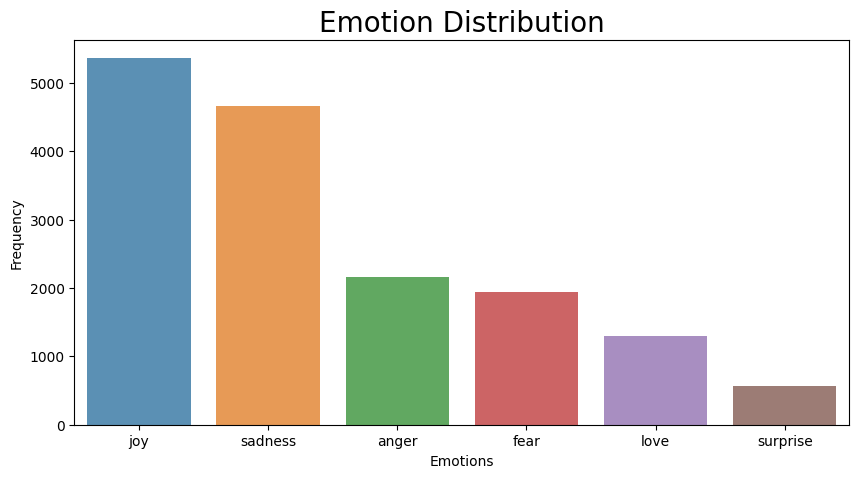

In [23]:
x_rating = final_df.label_name.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=x_rating.index, y=x_rating.values, alpha=0.8)
plt.title("Emotion Distribution", fontsize=20)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Emotions', fontsize=10)
plt.xticks(fontsize=10)

<AxesSubplot: title={'center': 'Percentage of Label'}, ylabel='label_name'>

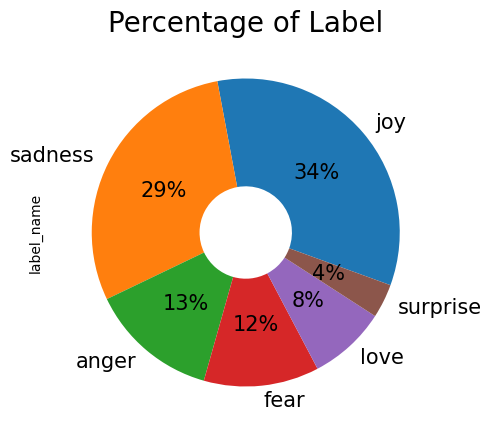

In [24]:
plt.figure(figsize=(10,5))
plt.title('Percentage of Label', fontsize=20)
final_df.label_name.value_counts().plot(kind='pie', labels=list(final_df.label_name.value_counts().index),
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

## 2) Sentiment Analysis
Sentiment analysis is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). I am using the TextBlob library to analyze sentiment. 

In [25]:
final_df['sentiment'] = final_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df.head()

label label_name                                    text_lemmatized  \
0      0    sadness                                  [feel, humiliate]   
1      0    sadness  [go, feel, hopeless, damn, hopeful, around, so...   
2      3      anger          [grab, minute, post, feel, greedy, wrong]   
3      2       love  [ever, feel, nostalgic, fireplace, know, still...   
4      3      anger                                    [feel, grouchy]   

                                        text_cleaned  sentiment  
0                                     feel humiliate        0.0  
1  go feel hopeless damn hopeful around someone c...        0.0  
2                 grab minute post feel greedy wrong       -0.5  
3  ever feel nostalgic fireplace know still property       -0.5  
4                                       feel grouchy        0.0

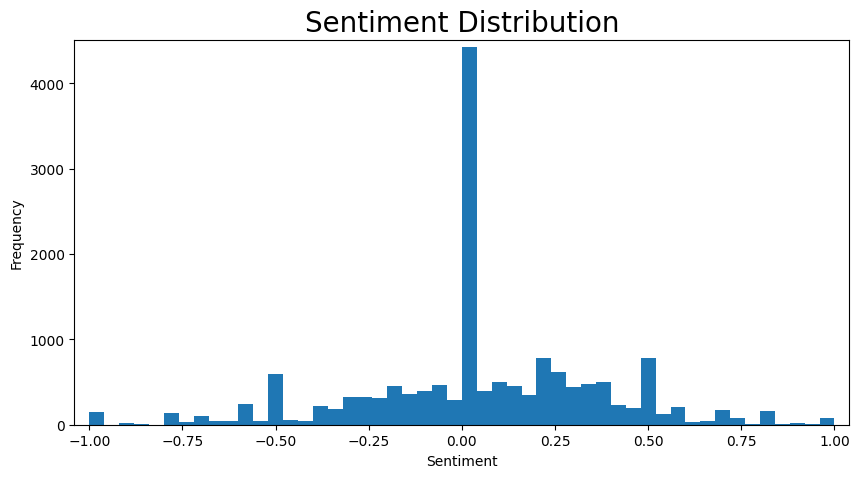

In [26]:
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.hist(final_df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

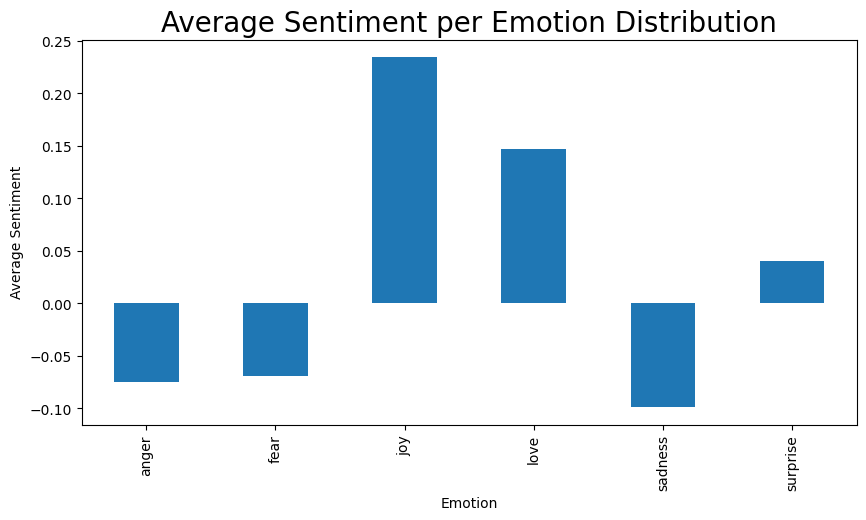

In [27]:
polarity_avg = final_df.groupby('label_name')['sentiment'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Emotion', fontsize=10)
plt.ylabel('Average Sentiment', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Sentiment per Emotion Distribution', fontsize=20)
plt.show()

## 3) Text Length Analysis

In [28]:
final_df['word_count'] = final_df['text_lemmatized'].apply(lambda x: len(str(x).split()))
final_df['tweet_len'] = final_df['text_cleaned'].astype(str).apply(len)
final_df

label label_name                                    text_lemmatized  \
0          0    sadness                                  [feel, humiliate]   
1          0    sadness  [go, feel, hopeless, damn, hopeful, around, so...   
2          3      anger          [grab, minute, post, feel, greedy, wrong]   
3          2       love  [ever, feel, nostalgic, fireplace, know, still...   
4          3      anger                                    [feel, grouchy]   
...      ...        ...                                                ...   
15995      0    sadness  [brief, time, beanbag, say, anna, feel, like, ...   
15996      0    sadness  [turn, feel, pathetic, still, wait, table, sub...   
15997      1        joy                      [feel, strong, good, overall]   
15998      3      anger                  [feel, like, rude, comment, glad]   
15999      0    sadness                 [know, lot, feel, stupid, portray]   

                                            text_cleaned  sentiment  \
0                                         feel humiliate   0.000000   
1      go feel hopeless damn hopeful around someone c...   0.000000   
2                     grab minute post feel greedy wrong  -0.500000   
3      ever feel nostalgic fireplace know still property  -0.500000   
4                                           feel grouchy   0.000000   
...                                                  ...        ...   
15995         brief time beanbag say anna feel like beat   0.000000   
15996  turn feel pathetic still wait table sub teach ...  -1.000000   
15997                           feel strong good overall   0.377778   
15998                        feel like rude comment glad   0.100000   
15999                       know lot feel stupid portray  -0.800000   

       word_count  tweet_len  
0               2         14  
1               9         55  
2               6         34  
3               7         49  
4               2         12  
...           ...        ...  
15995           8         42  
15996           9         52  
15997           4         24  
15998           5         27  
15999           5         28  

[16000 rows x 7 columns]

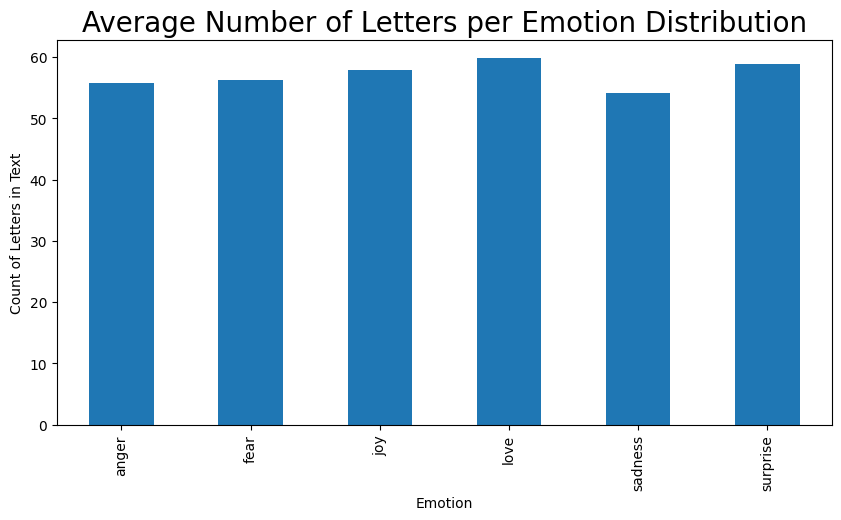

In [29]:
letter_avg = final_df.groupby('label_name')['tweet_len'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Emotion', fontsize=10)
plt.ylabel('Count of Letters in Text', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Number of Letters per Emotion Distribution', fontsize=20)
plt.show()

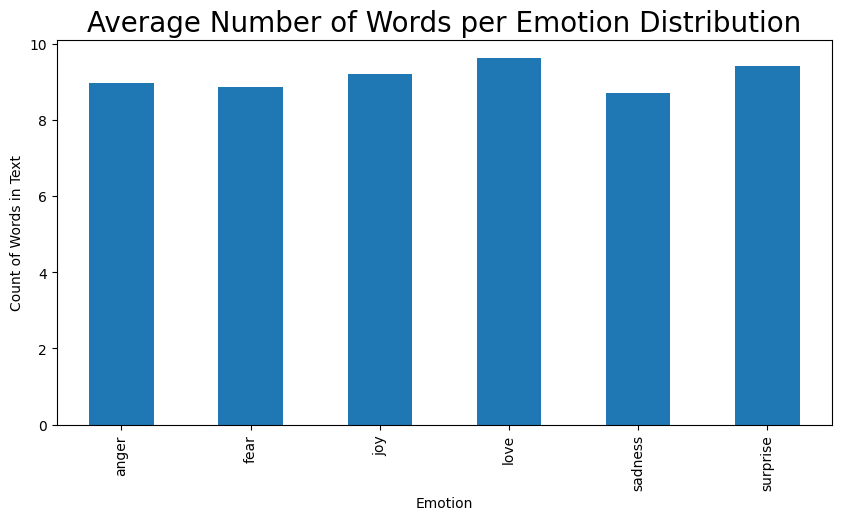

In [30]:
word_avg = final_df.groupby('label_name')['word_count'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Emotion', fontsize=10)
plt.ylabel('Count of Words in Text', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Number of Words per Emotion Distribution', fontsize=20)
plt.show()

<AxesSubplot: >

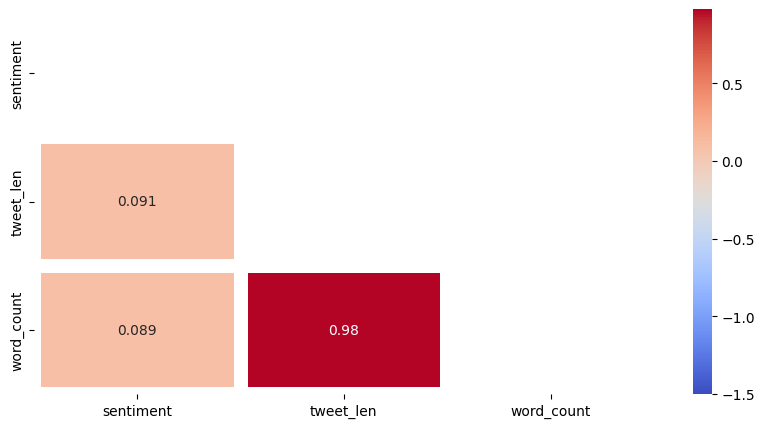

In [31]:
correlation = final_df[['label_name','sentiment', 'tweet_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask)

In [32]:
fig = px.histogram(final_df['tweet_len'], marginal='box', labels={'value': "Tweet Length"} )

fig.update_traces(marker=dict(line=dict(color='#000000', width=2) ))

fig.update_layout(title_text = 'Distribution of the Length of Text', title_x=0.5, title_font=dict(size=20)  )

fig.show()

In [33]:
fig = px.histogram(final_df['tweet_len'], marginal='box', labels={'value': "Tweet Length"}, color=final_df['label_name'] )

fig.update_traces(marker=dict(line=dict(color='#000000', width=2) ))

fig.update_layout(title_text = 'Distribution of the Length of Text by Emotions ', title_x=0.5, title_font=dict(size=20)  )

fig.show()

## 4) Word Level Analysis 

In [34]:
words = final_df['text_lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

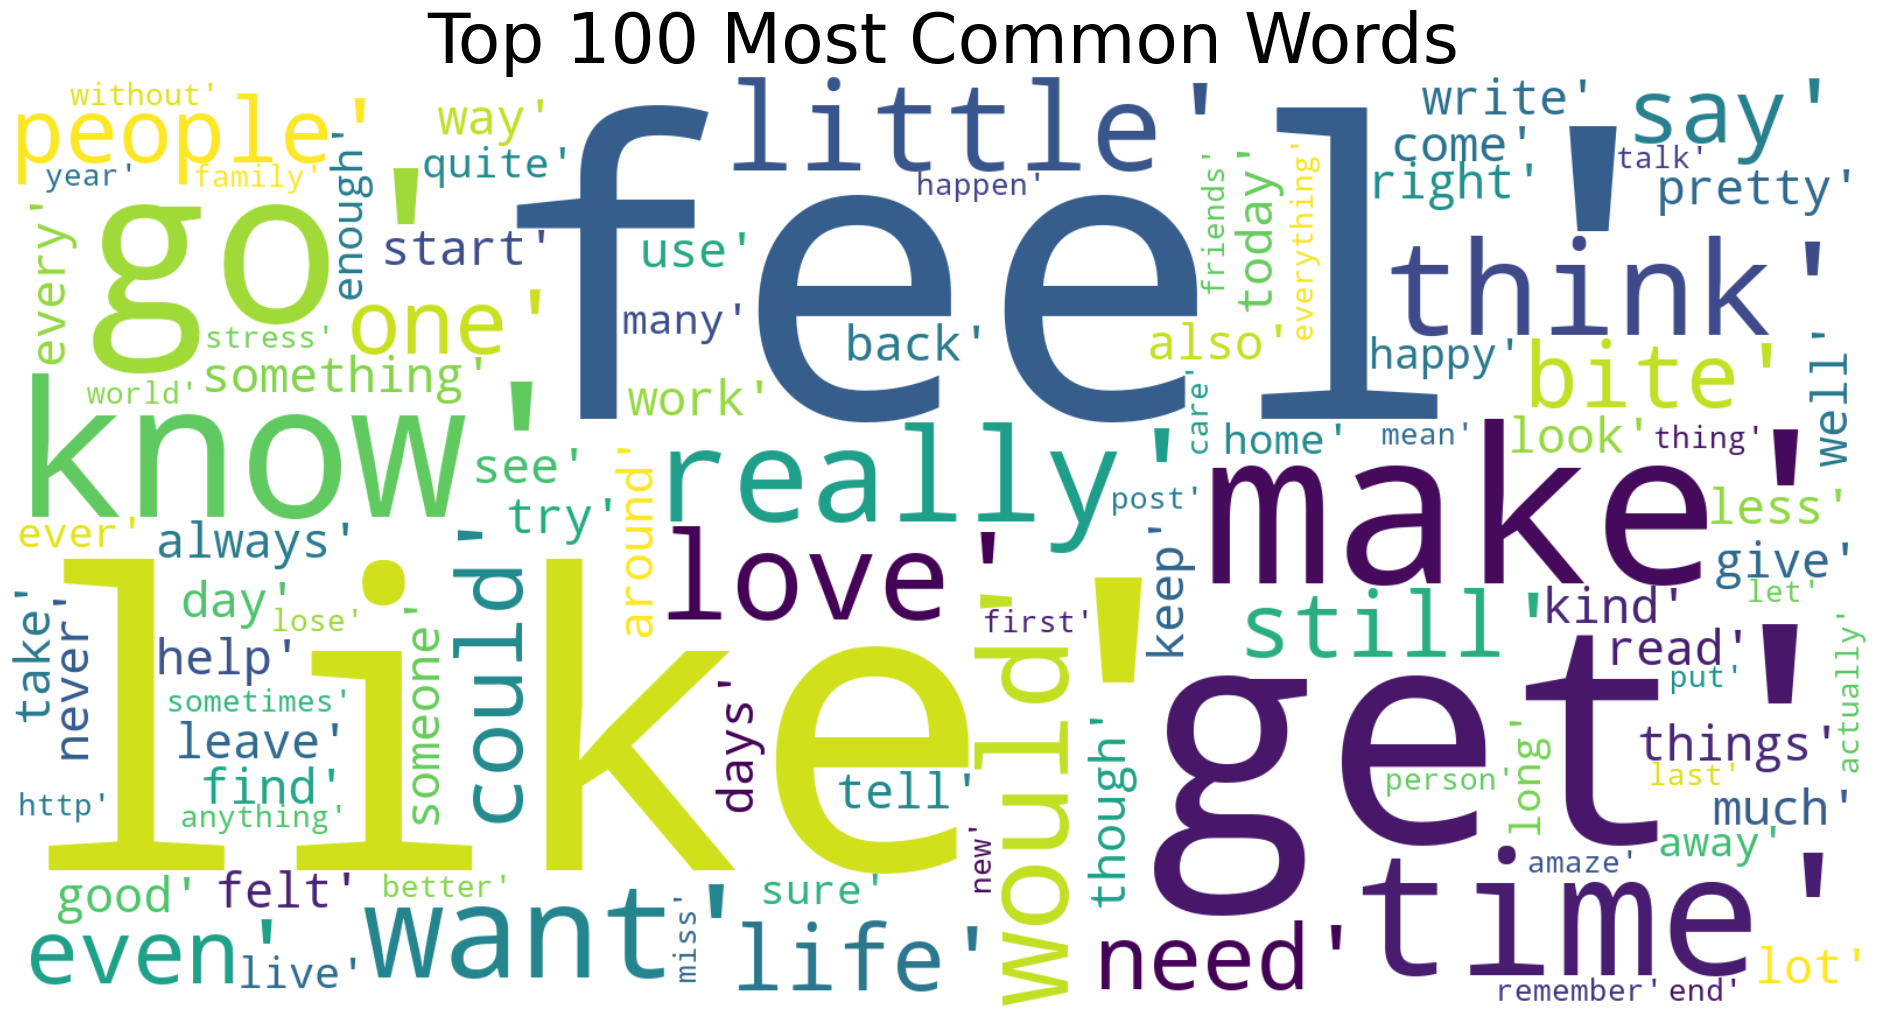

In [35]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

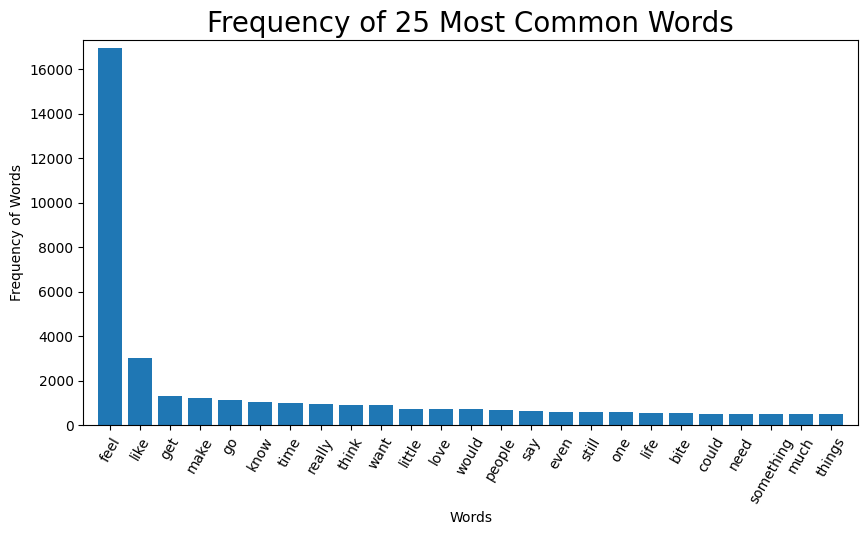

In [36]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

In [37]:
group_by = final_df.groupby('label')['text_cleaned'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by

label
0    [(feel, 4994), (like, 876), (get, 356), (make,...
1    [(feel, 5674), (like, 1016), (make, 489), (get...
2    [(feel, 1406), (like, 365), (love, 222), (know...
3    [(feel, 2261), (like, 391), (get, 223), (make,...
4    [(feel, 2025), (like, 261), (go, 165), (know, ...
5    [(feel, 601), (amaze, 107), (like, 91), (impre...
Name: text_cleaned, dtype: object

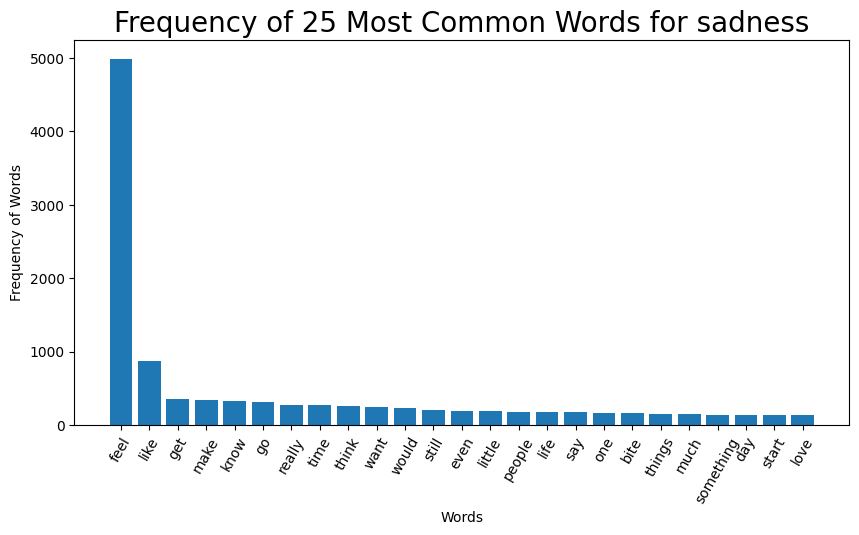

In [38]:
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(10,5))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(0)}', fontsize=20)
plt.show()

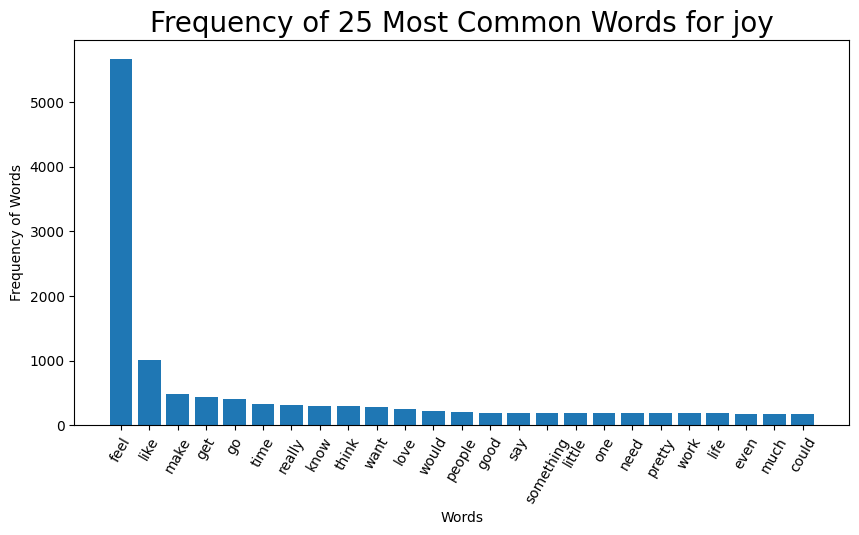

In [39]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(10,5))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(1)}', fontsize=20)
plt.show()

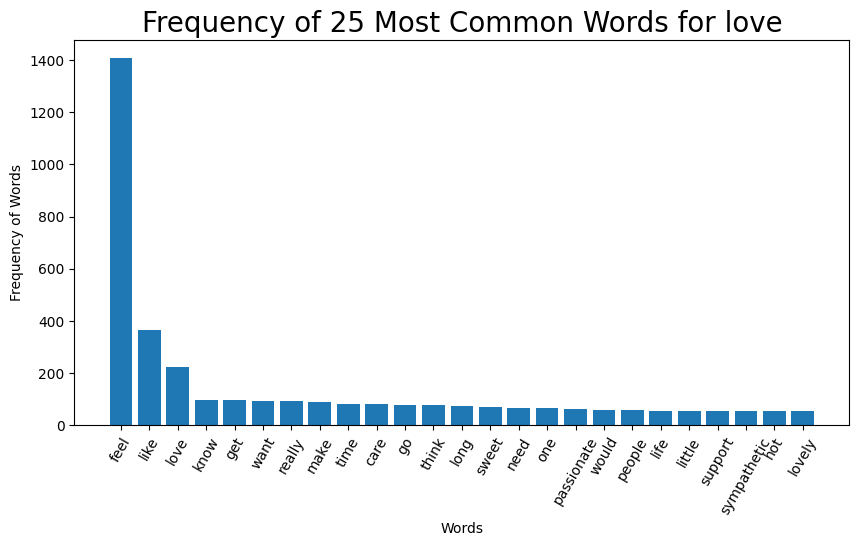

In [40]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2= list(zip(*group_by_2))[1]
plt.figure(figsize=(10,5))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(2)}', fontsize=20)
plt.show()

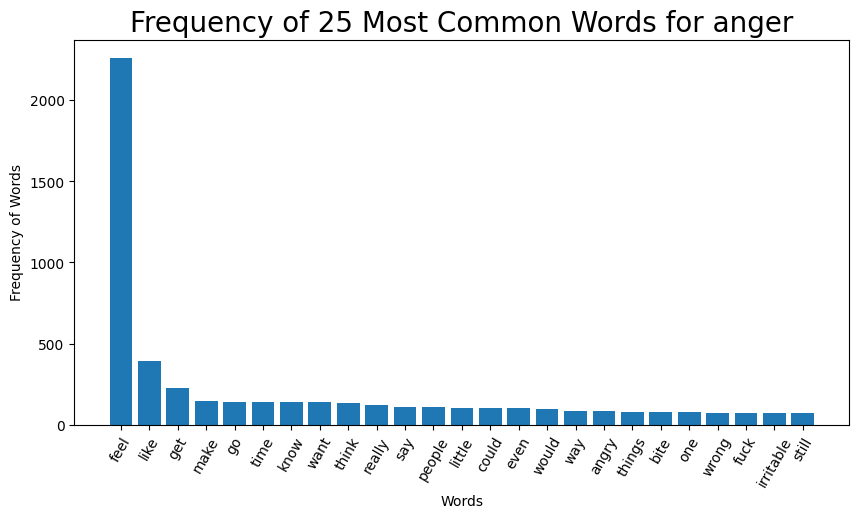

In [41]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3= list(zip(*group_by_3))[1]
plt.figure(figsize=(10,5))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(3)}', fontsize=20)
plt.show()

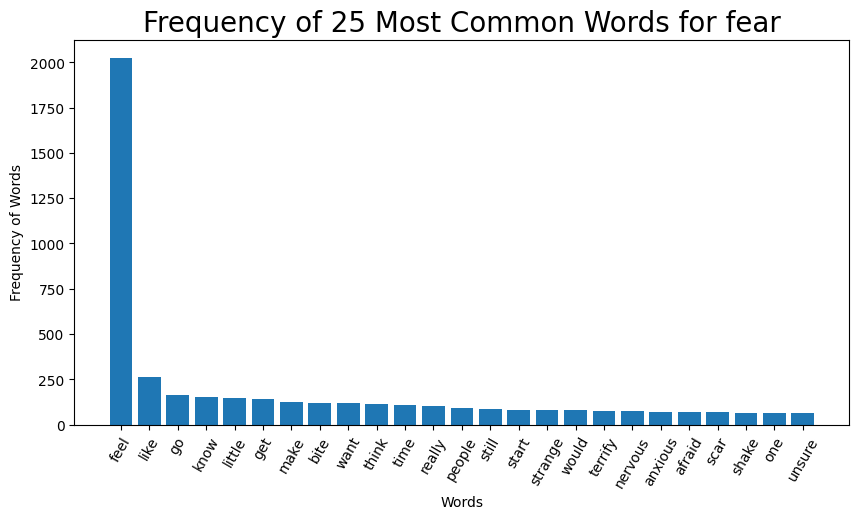

In [42]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4= list(zip(*group_by_4))[1]
plt.figure(figsize=(10,5))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(4)}', fontsize=20)
plt.show()

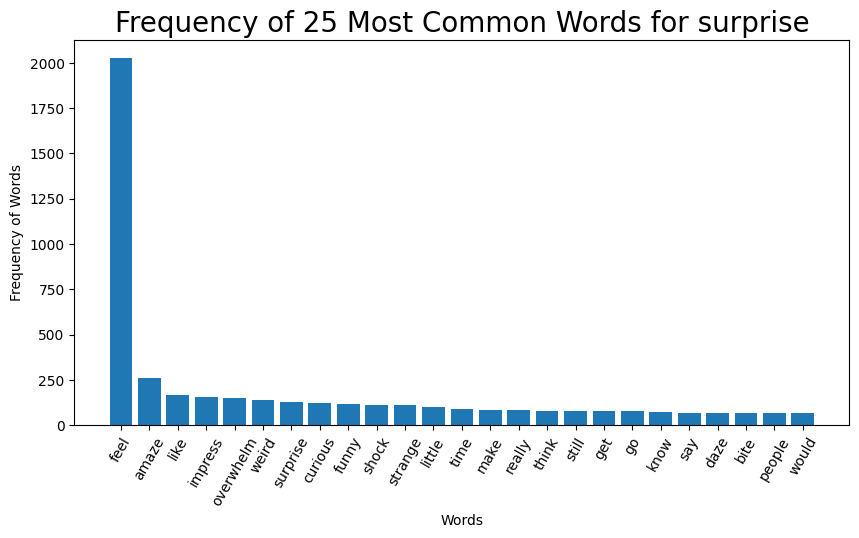

In [43]:
group_by_5 = group_by.iloc[5]
words5 = list(zip(*group_by_5))[0]
freq5= list(zip(*group_by_4))[1]
plt.figure(figsize=(10,5))
plt.bar(words5, freq5)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title(f'Frequency of 25 Most Common Words for {label_int2str(5)}', fontsize=20)
plt.show()

# Conclusion
1) The dataset is not evenly distributed amongst different labels. 'Joy' label has 34% of the data while 'Sadness' label has 29% of the data. Anger, fear,love and surprise have 13%,12%, 8% and 4% labels respectively. 

2) The Sentiment distribution is mostly around 0, suggesting the sentiment is neither too positive nor too negative.  
   The average sentiment for joy, love and surprise is positive , while average sentiment for fear, anger and sadness is negative 

3) The average length of the text is around 10-15 words and the average number of words used are around 8-10. All the emotions have similar values for average length of text and average number of words. There is some correlation of sentiment with the length of the text and number of words. However it is not too high to derive any conclusion.

4) The most frequently word used is 'feel'. This is consistent amongst every emotion label. The 2nd most frequently used word is 'like'. This is also consistent for 5 labels except 'surprise' where the 2nd most frequently used word is 'Amaze'. Other commonly used words for each label are

    Sadness- 'get, 'make', 'really', 'time', 'think'
    Joy- 'make', 'get','go','time',' really', 'know'
    Love - 'love','know','get','want, 'get', 'really'
    Anger - 'get, 'make', 'go', 'time', 'know'
    Fear - 'go', 'know', 'little', 'get','make','bite
    Surprise -'like','impress', 'overwhelm', 'weird', 'surprise

